# Yelp Data Challenge - Restaurant Recommender


In [1]:
# load library

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
% matplotlib inline
plt.style.use("ggplot")

In [2]:
# load data
df = pd.read_csv("../../YelpData/last_years_restaurant_reviews.csv")
df.head()

,business_id,name,categories,avg_stars,cool,date,funny,review_id,stars,text,useful,user_id
0,--9e1ONYQuAa-CB_Rrw7Tw,Delmonico Steakhouse,"[Steakhouses, Cajun/Creole, Restaurants]",4.0,0,2017-01-20,0,L8lo5SKXfZRlbn1bpPiC9w,5,Went here for guys weekend. Unbelievable. Ravi...,0,nT8zgjoc-PbdBoQsFEXFLw
1,--9e1ONYQuAa-CB_Rrw7Tw,Delmonico Steakhouse,"[Steakhouses, Cajun/Creole, Restaurants]",4.0,1,2017-02-12,0,3cnTdE45VrsS0o4cVhfGog,3,"Located inside my favorite hotel Venetian, Del...",1,rOIrilMC7VFwFVBeQNiKMw
2,--9e1ONYQuAa-CB_Rrw7Tw,Delmonico Steakhouse,"[Steakhouses, Cajun/Creole, Restaurants]",4.0,1,2017-04-18,0,QtLQQlmFINUSb2K_gE7J1Q,4,"Great food, great service. Expect to pay a pre...",1,ez3GBw83OIgzzgvc0R4jzw
3,--9e1ONYQuAa-CB_Rrw7Tw,Delmonico Steakhouse,"[Steakhouses, Cajun/Creole, Restaurants]",4.0,0,2017-01-03,0,oqQsexnfmYxRO-0NvxJN9A,5,My must stop at Vegas. Highly recommend to any...,0,gJrOPH-DSZWY_NX2j6Bugw
4,--9e1ONYQuAa-CB_Rrw7Tw,Delmonico Steakhouse,"[Steakhouses, Cajun/Creole, Restaurants]",4.0,0,2017-02-26,0,aw_5aKHlAzV0PSM7F92YFw,5,This place is top notch. We didn't order any a...,0,3Y_gz3wb7T5ur9FHqxBcgQ


# 1. Clean data and get rating data

### Select relevant columns in the original dataframe

In [3]:
# Get business_id, user_id, stars for recommender
df_stars = df[['business_id', 'user_id', 'stars']]

In [4]:
# stars distribution
df_stars['stars'].value_counts()

5    53533
4    21926
1    14422
3    11787
2     8794
Name: stars, dtype: int64

In [5]:
# number of unique business_id
df_stars['business_id'].nunique() # number of unique elements

3787

In [6]:
# number of unique user_id
df_stars['user_id'].nunique()

62934

In [7]:
# user comments counts
df_user_counts = df_stars['user_id'].value_counts()
df_user_counts.head()

bLbSNkLggFnqwNNzzq-Ijw    109
YE54kKTuqJJPNYWIKIpOEQ     84
JaqcCU3nxReTW2cBLHounA     80
y3FcL4bLy0eLlkb0SDPnBQ     76
80qYPp6Fk_jmO3334DKGGg     63
Name: user_id, dtype: int64

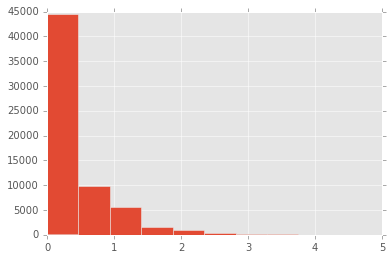

In [9]:
# display log histogram
# df_user_counts.hist()
df_user_counts.apply(np.log).hist()
plt.show()

#### There are many users that haven't given many reviews, exclude these users from the item-item similarity recommender.

In [10]:
# how many users only comments once
df_user_counts[df_user_counts == 1].sum()

44399

In [11]:
# users comment over 5 times
df_users = df_user_counts[df_user_counts > 5]

In [12]:
# count users comment over 5 times as active user
df_users.count()

2185

In [13]:
# sum of all comments
df_users.sum()

23050

In [14]:
# display active user id
df_users.index

Index([u'bLbSNkLggFnqwNNzzq-Ijw', u'YE54kKTuqJJPNYWIKIpOEQ',
       u'JaqcCU3nxReTW2cBLHounA', u'y3FcL4bLy0eLlkb0SDPnBQ',
       u'80qYPp6Fk_jmO3334DKGGg', u'P0rGN5mDue55uIiAzkrRlw',
       u'FQbVI3UyKlL-HfQGcRF8aA', u'SVH0qJBvYGLxrt6YuUdyyw',
       u'JQIZhoQB-Tg9hdBEj90m4g', u'lQBZo8_mm80dbwI5bo5c_w',
       ...
       u'iqBK-L6_HnPJK_apw73x0Q', u'-aV7azrzW2rlAm6G4DA-cw',
       u'KYJJoeFSBjgm1hSSY4y2yw', u'9KCoXFS7alSJsGfFsZANFQ',
       u'SPI7O1GKZTvJhiXNFj81Eg', u'12I0wU8oMqJqFSDOfCK-eg',
       u'EcYPCwJtFcQ-Ih9BG6mcUA', u'XpvqOy4CnhuzqB_o7bwgNQ',
       u'6fUC_vnkJxTtCzqFFY190g', u'hu1sIACDSqZ_TyP3K6nrsQ'],
      dtype='object', length=2185)

In [19]:
# df_stars.head()
# df_stars.set_index('user_id').head()
# df_stars.set_index('user_id').ix[df_users.index].head() # sorting with users
# df_stars.set_index('user_id').ix[df_users.index].reset_index().head()

In [16]:
# reorder dataframe
df_stars_cleaned = df_stars.set_index('user_id').ix[df_users.index].reset_index()
df_stars_cleaned.head()

,user_id,business_id,stars
0,bLbSNkLggFnqwNNzzq-Ijw,0i9S0BejjRv0ZDwdO9XymA,3
1,bLbSNkLggFnqwNNzzq-Ijw,2QznyHGF0PuiYkrl5RU66A,4
2,bLbSNkLggFnqwNNzzq-Ijw,2WiMyg8-DoXQ8_R5qFc2iQ,3
3,bLbSNkLggFnqwNNzzq-Ijw,2vr2yGIzSehe_ITFamNpyw,3
4,bLbSNkLggFnqwNNzzq-Ijw,4Nj2ktP2NjCbv2aKeH3ZBg,4


### Create utility matrix from records

In [17]:
# convert to document, word like matrix
df_utility = pd.pivot_table(data=df_stars_cleaned,
                            values='stars', # fill with stars
                            index='user_id', # rows
                            columns='business_id', # columns
                            fill_value=0) # fill missings

In [18]:
df_utility.head()

business_id,--9e1ONYQuAa-CB_Rrw7Tw,-3zffZUHoY8bQjGfPSoBKQ,-8R_-EkGpUhBk55K9Dd4mg,-9YyInW1wapzdNZrhQJ9dg,-AD5PiuJHgdUcAK-Vxao2A,-Bf8BQ3yMk8U2f45r2DRKw,-Bv-HHUs8aHzDrdWcZHn8w,-C8sSrFqaCxp51pyo-fQLQ,-CQokjildrY7UZezXCdEBw,-FNquqGseSCVMWo7KbK-Tg,...,zdcesxBdjljRgS0QmCgkBg,zjvnqTjBp56NhMp1GrlO5g,zmltWmTpoBt5sCU-5Kzj-Q,znWHLW1pt19HzW1VY6KfCA,zp-K5s3pGTWuuaVBWo6WZA,zpoZ6WyQUYff18-z4ZU1mA,zsQk990PubOHjr1YcLkQFw,zttcrQP4MxNS5X5itzStXg,zuwba6QEBIDZT0tJZmNhdQ,zwNC-Ow4eIMan2__bS9-rg
user_id,,,,,,,,,,,,,,,,,,,,,
--ZNfWKj1VyVElRx6-g1fg,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
-58xgulrXMhEHcUrKvlIuQ,0,0,0,0,0,0,0,0,0,0,...,0,0,0,3,0,0,0,0,0,0
-5ye1ya0wRQhNRF9NfQ1fA,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
-ApvB2uyNYkLCvSfwgLF7g,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
-BevLRnJhh9JeIT2g5I3mQ,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [19]:
# get the list of user id by checking out the index of the utility matrix
user_id_list = df_utility.index
user_id_list.shape

(2185,)

In [20]:
# get the list of item id by checking out the columns of the utility matrix
item_id_list = df_utility.columns
item_id_list.shape

(2979,)

## recommendation system with graphlab

In [21]:
import graphlab

## 2. Item-Item similarity recommender

In [22]:
sf_stars = graphlab.SFrame(df_stars)
sf_stars # SFrame similar to DataFrame

This non-commercial license of GraphLab Create for academic use is assigned to yl3449@nyu.edu and will expire on August 28, 2018.


[INFO] graphlab.cython.cy_server: GraphLab Create v2.1 started. Logging: /tmp/graphlab_server_1510717449.log


business_id,user_id,stars
--9e1ONYQuAa-CB_Rrw7Tw,nT8zgjoc-PbdBoQsFEXFLw,5
--9e1ONYQuAa-CB_Rrw7Tw,rOIrilMC7VFwFVBeQNiKMw,3
--9e1ONYQuAa-CB_Rrw7Tw,ez3GBw83OIgzzgvc0R4jzw,4
--9e1ONYQuAa-CB_Rrw7Tw,gJrOPH-DSZWY_NX2j6Bugw,5
--9e1ONYQuAa-CB_Rrw7Tw,3Y_gz3wb7T5ur9FHqxBcgQ,5
--9e1ONYQuAa-CB_Rrw7Tw,b4bTks98idS6-hx5AT92WQ,5
--9e1ONYQuAa-CB_Rrw7Tw,quX8U7dnq5YN6h1P04ps4g,5
--9e1ONYQuAa-CB_Rrw7Tw,gcz5baFhV096VSrB9EESXw,4
--9e1ONYQuAa-CB_Rrw7Tw,WAzX3AaM6PQfzFJHaUF6xQ,5
--9e1ONYQuAa-CB_Rrw7Tw,1kr9EZFV3T_l-8KBkfPo5Q,3


In [23]:
# item-item recommender
item_item_rec = graphlab.recommender.item_similarity_recommender.create(sf_stars,
                                                                        user_id='user_id',
                                                                        item_id='business_id',
                                                                        target = 'stars')

Recsys training: model = item_similarity

Preparing data set.

Data has 110462 observations with 62934 users and 3787 items.

Data prepared in: 0.329098s

Training model from provided data.

Gathering per-item and per-user statistics.

+--------------------------------+------------+

| Elapsed Time (Item Statistics) | % Complete |

+--------------------------------+------------+

| 1.682ms                        | 6.25       |

| 10.737ms                       | 100        |

+--------------------------------+------------+

Setting up lookup tables.

Processing data in one pass using dense lookup tables.

+-------------------------------------+------------------+-----------------+

| Elapsed Time (Constructing Lookups) | Total % Complete | Items Processed |

+-------------------------------------+------------------+-----------------+

| 24.953ms                            | 0                | 0               |

| 68.973ms                            | 100              | 3787            |

+-------------------------------------+------------------+-----------------+

Finalizing lookup tables.

Generating candidate set for working with new users.

Finished training in 1.09188s

In [24]:
item_item_rec_result = item_item_rec.recommend(k=3, verbose=False)

In [25]:
item_item_rec_result

user_id,business_id,score,rank
nT8zgjoc-PbdBoQsFEXFLw,IZivKqtHyz4-ts8KsnvMrA,0.0194174647331,1
nT8zgjoc-PbdBoQsFEXFLw,6Z6IyosSMciZtwk8hRLRag,0.018691599369,2
nT8zgjoc-PbdBoQsFEXFLw,LtXy1VinKWfuLFslVarKRw,0.0161290168762,3
rOIrilMC7VFwFVBeQNiKMw,IZivKqtHyz4-ts8KsnvMrA,0.0190984010696,1
rOIrilMC7VFwFVBeQNiKMw,KNTjauGqmib3sG1HWJyKEQ,0.0172413885593,2
rOIrilMC7VFwFVBeQNiKMw,eaNenRk_liZBERFFLCXqqQ,0.0120689570904,3
ez3GBw83OIgzzgvc0R4jzw,IZivKqtHyz4-ts8KsnvMrA,0.0194174647331,1
ez3GBw83OIgzzgvc0R4jzw,6Z6IyosSMciZtwk8hRLRag,0.018691599369,2
ez3GBw83OIgzzgvc0R4jzw,LtXy1VinKWfuLFslVarKRw,0.0161290168762,3
gJrOPH-DSZWY_NX2j6Bugw,IZivKqtHyz4-ts8KsnvMrA,0.0194174647331,1


# 3. Content-based recommender

### extract some feature for recommender

In [26]:
# group by business_id, then average numerical features

df_average = df.groupby(['business_id']).mean()
df_average.head()

,avg_stars,cool,funny,stars,useful
business_id,,,,,
--9e1ONYQuAa-CB_Rrw7Tw,4.0,0.578313,0.301205,4.012048,0.674699
-3zffZUHoY8bQjGfPSoBKQ,4.0,0.394737,0.263158,4.157895,0.921053
-8R_-EkGpUhBk55K9Dd4mg,3.5,1.733333,1.533333,3.800000,1.866667
-9YyInW1wapzdNZrhQJ9dg,2.5,0.120000,0.040000,2.880000,0.360000
-AD5PiuJHgdUcAK-Vxao2A,3.5,0.272727,0.000000,3.818182,0.181818


In [27]:
# group by business_id, extract categories data

categories_series = df.groupby(['business_id']).categories.apply(np.unique)
categories_series.head()

business_id
--9e1ONYQuAa-CB_Rrw7Tw           [[Steakhouses, Cajun/Creole, Restaurants]]
-3zffZUHoY8bQjGfPSoBKQ    [[Seafood, Bars, Nightlife, American (New), Re...
-8R_-EkGpUhBk55K9Dd4mg                                [[Restaurants, Thai]]
-9YyInW1wapzdNZrhQJ9dg                             [[Buffets, Restaurants]]
-AD5PiuJHgdUcAK-Vxao2A                             [[Burgers, Restaurants]]
Name: categories, dtype: object

In [28]:
# convert categories data to string remove `[]`
categories_series = categories_series.str.join('').apply(lambda x: x[1:-1])

In [29]:
# business_id, categories table
from sklearn.feature_extraction.text import CountVectorizer

vectorizer = CountVectorizer()
categories_mat = vectorizer.fit_transform(categories_series).toarray()
categories = vectorizer.get_feature_names()
df_categories = pd.DataFrame(categories_mat,
                             columns=categories, 
                             index=categories_series.index)
df_categories.head()

,acai,active,activities,acupuncture,adult,afghan,african,air,aircraft,airport,...,wedding,weight,windshield,wine,wineries,wings,women,wraps,yogurt,yourself
business_id,,,,,,,,,,,,,,,,,,,,,
--9e1ONYQuAa-CB_Rrw7Tw,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
-3zffZUHoY8bQjGfPSoBKQ,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
-8R_-EkGpUhBk55K9Dd4mg,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
-9YyInW1wapzdNZrhQJ9dg,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
-AD5PiuJHgdUcAK-Vxao2A,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [30]:
# use svd to reduce dimension
from sklearn.decomposition import TruncatedSVD
svd = TruncatedSVD(n_components=150,
                   random_state=42)

svd.fit(categories_mat)
categories_svd = svd.transform(categories_mat)
df_categories_svd = pd.DataFrame(categories_svd,
                                 index=categories_series.index)

print(svd.explained_variance_ratio_.sum()) # total variance explained
df_categories_svd.head()

0.981483389312


,0,1,2,3,4,5,6,7,8,9,...,140,141,142,143,144,145,146,147,148,149
business_id,,,,,,,,,,,,,,,,,,,,,
--9e1ONYQuAa-CB_Rrw7Tw,0.733138,0.021489,-0.423815,-0.462291,0.015708,0.013803,0.037292,-0.114676,0.069997,0.035365,...,0.006857,-0.000868,0.002239,0.006650,0.005842,-0.002342,-0.020052,-0.000159,0.006176,0.003271
-3zffZUHoY8bQjGfPSoBKQ,1.511547,1.338673,-0.025949,0.163352,-0.041222,-0.235246,0.118782,-0.278485,-0.072936,0.436694,...,-0.009054,-0.010682,0.000332,-0.005104,-0.007077,0.012808,-0.003127,0.007614,0.006368,0.001309
-8R_-EkGpUhBk55K9Dd4mg,0.709290,-0.014500,-0.411688,-0.482273,-0.001198,0.044376,0.038185,-0.104923,0.093977,0.026509,...,-0.004226,0.003561,-0.008718,0.007682,0.001178,0.000242,0.000823,0.002218,0.001461,0.005446
-9YyInW1wapzdNZrhQJ9dg,0.707311,-0.004842,-0.420380,-0.469023,-0.001920,0.040321,0.029455,-0.074550,0.061972,0.015757,...,-0.006390,0.000974,0.000955,0.007298,0.008184,-0.002770,0.000983,0.001991,0.000628,-0.001291
-AD5PiuJHgdUcAK-Vxao2A,0.777385,-0.043073,-0.460305,-0.390833,-0.154497,-0.105969,-0.089356,0.253639,0.271147,-0.121227,...,-0.004075,-0.003353,-0.003064,0.002217,0.007646,0.000269,-0.004704,0.001629,0.000612,-0.003388


In [31]:
# display feature matrix dimension

print 'df_average : ', df_average.shape
print 'df_categories : ', df_categories.shape
print 'df_categories_svd : ', df_categories_svd.shape

df_average :  (3787, 5)
df_categories :  (3787, 425)
df_categories_svd :  (3787, 150)


In [32]:
# join two to generate feature data for each business_id

df_business = df_average.join(df_categories_svd)

In [33]:
print df_business.shape
df_business.head()

(3787, 155)


,avg_stars,cool,funny,stars,useful,0,1,2,3,4,...,140,141,142,143,144,145,146,147,148,149
business_id,,,,,,,,,,,,,,,,,,,,,
--9e1ONYQuAa-CB_Rrw7Tw,4.0,0.578313,0.301205,4.012048,0.674699,0.733138,0.021489,-0.423815,-0.462291,0.015708,...,0.006857,-0.000868,0.002239,0.006650,0.005842,-0.002342,-0.020052,-0.000159,0.006176,0.003271
-3zffZUHoY8bQjGfPSoBKQ,4.0,0.394737,0.263158,4.157895,0.921053,1.511547,1.338673,-0.025949,0.163352,-0.041222,...,-0.009054,-0.010682,0.000332,-0.005104,-0.007077,0.012808,-0.003127,0.007614,0.006368,0.001309
-8R_-EkGpUhBk55K9Dd4mg,3.5,1.733333,1.533333,3.800000,1.866667,0.709290,-0.014500,-0.411688,-0.482273,-0.001198,...,-0.004226,0.003561,-0.008718,0.007682,0.001178,0.000242,0.000823,0.002218,0.001461,0.005446
-9YyInW1wapzdNZrhQJ9dg,2.5,0.120000,0.040000,2.880000,0.360000,0.707311,-0.004842,-0.420380,-0.469023,-0.001920,...,-0.006390,0.000974,0.000955,0.007298,0.008184,-0.002770,0.000983,0.001991,0.000628,-0.001291
-AD5PiuJHgdUcAK-Vxao2A,3.5,0.272727,0.000000,3.818182,0.181818,0.777385,-0.043073,-0.460305,-0.390833,-0.154497,...,-0.004075,-0.003353,-0.003064,0.002217,0.007646,0.000269,-0.004704,0.001629,0.000612,-0.003388


In [34]:
# prepare data

item_data = graphlab.SFrame(df_business.reset_index())

In [35]:
# build content based recommender

content_rec = graphlab.recommender.item_content_recommender.create(item_data, "business_id")

('Applying transform:\n', Class             : AutoVectorizer

Model Fields
------------
Features          : ['avg_stars', 'cool', 'funny', 'stars', 'useful', '0', '1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12', '13', '14', '15', '16', '17', '18', '19', '20', '21', '22', '23', '24', '25', '26', '27', '28', '29', '30', '31', '32', '33', '34', '35', '36', '37', '38', '39', '40', '41', '42', '43', '44', '45', '46', '47', '48', '49', '50', '51', '52', '53', '54', '55', '56', '57', '58', '59', '60', '61', '62', '63', '64', '65', '66', '67', '68', '69', '70', '71', '72', '73', '74', '75', '76', '77', '78', '79', '80', '81', '82', '83', '84', '85', '86', '87', '88', '89', '90', '91', '92', '93', '94', '95', '96', '97', '98', '99', '100', '101', '102', '103', '104', '105', '106', '107', '108', '109', '110', '111', '112', '113', '114', '115', '116', '117', '118', '119', '120', '121', '122', '123', '124', '125', '126', '127', '128', '129', '130', '131', '132', '133', '134', '135', 

Recsys training: model = item_content_recommender

Defaulting to brute force instead of ball tree because there are multiple distance components.


Starting brute force nearest neighbors model training.

Starting pairwise querying.

+--------------+---------+-------------+--------------+

| Query points | # Pairs | % Complete. | Elapsed Time |

+--------------+---------+-------------+--------------+

| 1            | 3787    | 0.0264061   | 96.968ms     |

| 142          | 537754  | 3.74967     | 1.10s        |

| 289          | 1094443 | 7.63137     | 2.10s        |

| 423          | 1601901 | 11.1698     | 3.10s        |

| 540          | 2044980 | 14.2593     | 4.10s        |

| 665          | 2518355 | 17.5601     | 5.09s        |

| 793          | 3003091 | 20.9401     | 6.10s        |

| 926          | 3506762 | 24.4521     | 7.10s        |

| 1060         | 4014220 | 27.9905     | 8.10s        |

| 1212         | 4589844 | 32.0042     | 9.10s        |

| 1364         | 5165468 | 36.018      | 10.10s       |

| 1513         | 5729731 | 39.9525     | 11.10s       |

| 1653         | 6259911 | 43.6493     | 12.10s       |

| 1790         | 6778730 | 47.267      | 13.10s       |

| 1951         | 7388437 | 51.5184     | 14.09s       |

| 2091         | 7918617 | 55.2152     | 15.11s       |

| 2233         | 8456371 | 58.9649     | 16.09s       |

| 2364         | 8952468 | 62.4241     | 17.09s       |

| 2515         | 9524305 | 66.4114     | 18.10s       |

| 2674         | 1e+07   | 70.61       | 19.11s       |

| 2821         | 1.1e+07 | 74.4917     | 20.10s       |

| 2958         | 1.1e+07 | 78.1093     | 21.10s       |

| 3096         | 1.2e+07 | 81.7534     | 22.10s       |

| 3227         | 1.2e+07 | 85.2126     | 23.09s       |

| 3367         | 1.3e+07 | 88.9094     | 24.11s       |

| 3518         | 1.3e+07 | 92.8968     | 25.10s       |

| 3679         | 1.4e+07 | 97.1481     | 26.11s       |

| 3782         | 1.4e+07 | 99.868      | 27.11s       |

| Done         |         | 100         | 27.28s       |

+--------------+---------+-------------+--------------+

Preparing data set.

Data has 0 observations with 0 users and 3787 items.

Data prepared in: 0.262104s

Loading user-provided nearest items.

Generating candidate set for working with new users.

Finished training in 0.015866s

In [37]:
sample_item

['--9e1ONYQuAa-CB_Rrw7Tw']

In [36]:
# make recommendation for a single item

sample_item = [df_stars.iloc[0].business_id]
content_rec.recommend_from_interactions(sample_item) # recommendation from single item

business_id,score,rank
uWECX6-Uq9n8v5ipk9R29A,0.916558623314,1
TT658qQinO6MBHP9q7rJ8w,0.91616910696,2
zcScEL0WEdFkROcnz5379g,0.868158102036,3
L2W0QLXIIR5MEmhQwZk-iA,0.866825044155,4
p3YqOYELqXtLyHz9T49p_w,0.865006804466,5
5TY6bUT3bbl9aHItiIXXqw,0.863072693348,6
UNI1agsPX2k3eJSJVB91nw,0.840923309326,7
VPO8pBUwYz1u6GoG0d2U-Q,0.834411859512,8
L_ZLtfHvfzfoNVQ0-okTXg,0.833248853683,9
n_o2DAmDBAZ-RjVDSY-5uQ,0.832753956318,10


In [38]:
# similar items per item

similar_items_df = content_rec.get_similar_items().to_dataframe()
similar_items_df.head(30)

,business_id,similar,score,rank
0,--9e1ONYQuAa-CB_Rrw7Tw,uWECX6-Uq9n8v5ipk9R29A,0.916559,1
1,--9e1ONYQuAa-CB_Rrw7Tw,TT658qQinO6MBHP9q7rJ8w,0.916169,2
2,--9e1ONYQuAa-CB_Rrw7Tw,zcScEL0WEdFkROcnz5379g,0.868158,3
3,--9e1ONYQuAa-CB_Rrw7Tw,L2W0QLXIIR5MEmhQwZk-iA,0.866825,4
4,--9e1ONYQuAa-CB_Rrw7Tw,p3YqOYELqXtLyHz9T49p_w,0.865007,5
5,--9e1ONYQuAa-CB_Rrw7Tw,5TY6bUT3bbl9aHItiIXXqw,0.863073,6
6,--9e1ONYQuAa-CB_Rrw7Tw,UNI1agsPX2k3eJSJVB91nw,0.840923,7
7,--9e1ONYQuAa-CB_Rrw7Tw,VPO8pBUwYz1u6GoG0d2U-Q,0.834412,8
8,--9e1ONYQuAa-CB_Rrw7Tw,L_ZLtfHvfzfoNVQ0-okTXg,0.833249,9
9,--9e1ONYQuAa-CB_Rrw7Tw,n_o2DAmDBAZ-RjVDSY-5uQ,0.832754,10


In [39]:
# make recommendation for a sample user
df_favored = df_stars[df_stars.stars > 4] # select favored restuarants
bid_favored = df_favored[df_favored.user_id == df_favored.user_id.iloc[0]]

# first select favored restaurants' similar items
# second sort those restaurants, then got top 5
similar_items_df[similar_items_df['business_id'].isin(bid_favored.business_id)].sort('score',ascending=False).similar[:5]

/home/ye/anaconda2/envs/gl-env/lib/python2.7/site-packages/ipykernel/__main__.py:7: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)


0    uWECX6-Uq9n8v5ipk9R29A
1    TT658qQinO6MBHP9q7rJ8w
2    zcScEL0WEdFkROcnz5379g
3    L2W0QLXIIR5MEmhQwZk-iA
4    p3YqOYELqXtLyHz9T49p_w
Name: similar, dtype: object

# 4. Popularity-based recommender

In [40]:
# data
sf_stars

business_id,user_id,stars
--9e1ONYQuAa-CB_Rrw7Tw,nT8zgjoc-PbdBoQsFEXFLw,5
--9e1ONYQuAa-CB_Rrw7Tw,rOIrilMC7VFwFVBeQNiKMw,3
--9e1ONYQuAa-CB_Rrw7Tw,ez3GBw83OIgzzgvc0R4jzw,4
--9e1ONYQuAa-CB_Rrw7Tw,gJrOPH-DSZWY_NX2j6Bugw,5
--9e1ONYQuAa-CB_Rrw7Tw,3Y_gz3wb7T5ur9FHqxBcgQ,5
--9e1ONYQuAa-CB_Rrw7Tw,b4bTks98idS6-hx5AT92WQ,5
--9e1ONYQuAa-CB_Rrw7Tw,quX8U7dnq5YN6h1P04ps4g,5
--9e1ONYQuAa-CB_Rrw7Tw,gcz5baFhV096VSrB9EESXw,4
--9e1ONYQuAa-CB_Rrw7Tw,WAzX3AaM6PQfzFJHaUF6xQ,5
--9e1ONYQuAa-CB_Rrw7Tw,1kr9EZFV3T_l-8KBkfPo5Q,3


In [41]:
# build recommendation system
pop_rec = graphlab.popularity_recommender.create(sf_stars, 
                                                 user_id = 'user_id', 
                                                 item_id = 'business_id',
                                                 target = 'stars')

Recsys training: model = popularity

Preparing data set.

Data has 110462 observations with 62934 users and 3787 items.

Data prepared in: 0.191187s

110462 observations to process; with 3787 unique items.

In [42]:
# get recommendation
pop_result = pop_rec.recommend()

recommendations finished on 1000/62934 queries. users per second: 145603

recommendations finished on 2000/62934 queries. users per second: 157828

recommendations finished on 3000/62934 queries. users per second: 163416

recommendations finished on 4000/62934 queries. users per second: 165207

recommendations finished on 5000/62934 queries. users per second: 162670

recommendations finished on 6000/62934 queries. users per second: 163035

recommendations finished on 7000/62934 queries. users per second: 165274

recommendations finished on 8000/62934 queries. users per second: 164328

recommendations finished on 9000/62934 queries. users per second: 163607

recommendations finished on 10000/62934 queries. users per second: 161791

recommendations finished on 11000/62934 queries. users per second: 161402

recommendations finished on 12000/62934 queries. users per second: 162760

recommendations finished on 13000/62934 queries. users per second: 161531

recommendations finished on 14000/62934 queries. users per second: 160762

recommendations finished on 15000/62934 queries. users per second: 161141

recommendations finished on 16000/62934 queries. users per second: 161381

recommendations finished on 17000/62934 queries. users per second: 160163

recommendations finished on 18000/62934 queries. users per second: 159915

recommendations finished on 19000/62934 queries. users per second: 160641

recommendations finished on 20000/62934 queries. users per second: 159775

recommendations finished on 21000/62934 queries. users per second: 158753

recommendations finished on 22000/62934 queries. users per second: 159057

recommendations finished on 23000/62934 queries. users per second: 158514

recommendations finished on 24000/62934 queries. users per second: 156878

recommendations finished on 25000/62934 queries. users per second: 157733

recommendations finished on 26000/62934 queries. users per second: 157895

recommendations finished on 27000/62934 queries. users per second: 155613

recommendations finished on 28000/62934 queries. users per second: 154308

recommendations finished on 29000/62934 queries. users per second: 153364

recommendations finished on 30000/62934 queries. users per second: 152333

recommendations finished on 31000/62934 queries. users per second: 152267

recommendations finished on 32000/62934 queries. users per second: 151974

recommendations finished on 33000/62934 queries. users per second: 151951

recommendations finished on 34000/62934 queries. users per second: 151978

recommendations finished on 35000/62934 queries. users per second: 151790

recommendations finished on 36000/62934 queries. users per second: 151464

recommendations finished on 37000/62934 queries. users per second: 151209

recommendations finished on 38000/62934 queries. users per second: 151745

recommendations finished on 39000/62934 queries. users per second: 151924

recommendations finished on 40000/62934 queries. users per second: 152325

recommendations finished on 41000/62934 queries. users per second: 152741

recommendations finished on 42000/62934 queries. users per second: 153100

recommendations finished on 43000/62934 queries. users per second: 152876

recommendations finished on 44000/62934 queries. users per second: 152662

recommendations finished on 45000/62934 queries. users per second: 152600

recommendations finished on 46000/62934 queries. users per second: 152898

recommendations finished on 47000/62934 queries. users per second: 153122

recommendations finished on 48000/62934 queries. users per second: 153424

recommendations finished on 49000/62934 queries. users per second: 152677

recommendations finished on 50000/62934 queries. users per second: 152909

recommendations finished on 51000/62934 queries. users per second: 153118

recommendations finished on 52000/62934 queries. users per second: 152642

recommendations finished on 53000/62934 queries. users per second: 152581

recommendations finished on 54000/62934 queries. users per second: 151856

recommendations finished on 55000/62934 queries. users per second: 151113

recommendations finished on 56000/62934 queries. users per second: 151042

recommendations finished on 57000/62934 queries. users per second: 150738

recommendations finished on 58000/62934 queries. users per second: 149422

recommendations finished on 59000/62934 queries. users per second: 148764

recommendations finished on 60000/62934 queries. users per second: 147567

recommendations finished on 61000/62934 queries. users per second: 146328

recommendations finished on 62000/62934 queries. users per second: 139394

In [43]:
pop_result.print_rows(num_rows=30, num_columns=3)

+------------------------+------------------------+-------+-----+
|        user_id         |      business_id       | score | ... |
+------------------------+------------------------+-------+-----+
| nT8zgjoc-PbdBoQsFEXFLw | 0rk2_lmbfpiYXGBFmyxx9Q |  5.0  | ... |
| nT8zgjoc-PbdBoQsFEXFLw | 0qPNeqLuKE88rKbIbSZDpg |  5.0  | ... |
| nT8zgjoc-PbdBoQsFEXFLw | 0mnnlFCploePlnEaddw63g |  5.0  | ... |
| nT8zgjoc-PbdBoQsFEXFLw | -zbJp3NGEhvmNOiFziN8Lg |  5.0  | ... |
| nT8zgjoc-PbdBoQsFEXFLw | -tseCGdDvepLP8IIWtZikQ |  5.0  | ... |
| nT8zgjoc-PbdBoQsFEXFLw | -kbPPBNsIPDfMfgUGO7QhA |  5.0  | ... |
| nT8zgjoc-PbdBoQsFEXFLw | -WQhVJnBmyapFn0digQJwg |  5.0  | ... |
| nT8zgjoc-PbdBoQsFEXFLw | -UtYWvCnUppcSaC_u1pTYQ |  5.0  | ... |
| nT8zgjoc-PbdBoQsFEXFLw | -CbDQXiuKzPQ0_jiUz03aw |  5.0  | ... |
| nT8zgjoc-PbdBoQsFEXFLw | -BmqghX1sv7sgsxOIS2yAg |  5.0  | ... |
| rOIrilMC7VFwFVBeQNiKMw | 0rk2_lmbfpiYXGBFmyxx9Q |  5.0  | ... |
| rOIrilMC7VFwFVBeQNiKMw | 0qPNeqLuKE88rKbIbSZDpg |  5.0  | ... |
| rOIrilMC

# 5. Hybrid Recommender

for active user using item-item recommender, for inactive user using popularity recommender